## 17th June getting into the next topic which is **Conditional Graph**

### The objectives of this topic is pretty simple which is 

#### 1. implement logic to route of the flow of data , use start and end nodes to manage entry and exit points explicitly , design multiple nodes to perform diff ops ( + , * , - , / ) 

#### 2. create a router node to handle decision making and control graph flow 

#### the goal is to get used to add_conditional_edges()

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START , END 

In [2]:
class AgentStateC(TypedDict) :
    num1: int 
    op : str 
    num2 : int 
    finalnum : int  

In [4]:
def adder(state : AgentStateC) -> AgentStateC :
    """ This node adds 2 numbers """

    state['finalnum'] = state['num1'] + state['num2']

    return state 

def subtractor(state: AgentStateC) -> AgentStateC : 
    """ This node subtracts 2 numbers """
    
    state['finalnum'] = state['num1'] - state['num2']

    return state 

def decide_next_node(state: AgentStateC) -> AgentStateC : 
    """ this node will select next node of the graph """

    if state["op"] == "+": 
        return "addop"
    elif state["op"] == "-": 
        return "subop"

In [8]:
graph = StateGraph(AgentStateC)

graph.add_node("add_node" , adder)

graph.add_node("sub_node", subtractor)

graph.add_node("router", lambda state:state) # your input state will be your output state  

graph.add_edge(START , "router")

graph.add_conditional_edges(

    "router", # this is the start 
    decide_next_node,# this is the path , 
    {
        "addop" : "add_node",
        "subop" : "sub_node"
    }

)

graph.add_edge("add_node" , END)

graph.add_edge("sub_node", END)

app = graph.compile()

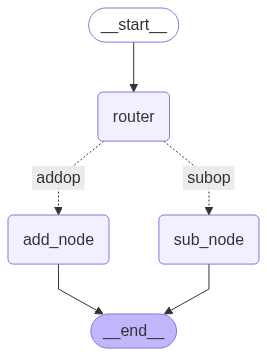

In [9]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = AgentStateC(num1 = 12 , op = "+", num2 = 2122121)

print(app.invoke(result))

{'num1': 12, 'op': '+', 'num2': 2122121, 'finalnum': 2122133}


### the only thing thats actually making me confused is how he made the nodes different but the output and the edges they are the same so theres no need to be overwhelmed 